# REDES NEURAIS ARTIFICIAIS

[Aula 3 de Deep Learning](http://bit.ly/dn-unb03) da Engenharia de Software da UnB

# Parte 1 - Pré-processamento dos Dados

### Importar as libs

In [121]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [122]:
tf.__version__

'2.4.1'

### Importar o dataset

In [123]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [124]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
print("X >>\n",X)
print("y >>\n",y)

X >>
 [[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
y >>
 [1 0 1 ... 1 1 0]


### Transformando os dados categóricos


In [125]:
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]
[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Dividindo o dataset em conjunto de treinamento e conjunto de teste

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [127]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
np.shape(X_train)

(8000, 12)

---
# Parte 2 -Vamos construir uma ANN!


### Initializing the ANN

In [128]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [129]:
ann.add(tf.keras.layers.Dense(units=6, activation='sigmoid'))

### Adding the second hidden layer

In [130]:
ann.add(tf.keras.layers.Dense(units=6,  activation='softmax'))

### Adding the output layer

In [131]:
ann.add(tf.keras.layers.Dense(units=1, activation='tanh'))


# Part 3 - Training the ANN

### Compiling the ANN

In [132]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [133]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.7004 - accuracy: 0.7988
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.7947
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.8035
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4549 - accuracy: 0.7945
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.7908
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8025
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4401 - accuracy: 0.7917
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.8002
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.8005
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4390 - accura

# Parte 3 - Fazendo predições e avaliando o modelo

## Prevendo os resultados com o conjunto de testes

In [134]:
y_pred = ann.predict(X_test)
y_pred

array([[0.2360961 ],
       [0.29556942],
       [0.19394968],
       ...,
       [0.14490975],
       [0.11822603],
       [0.24506554]], dtype=float32)

In [135]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

# Criando uma Confusion Matrix

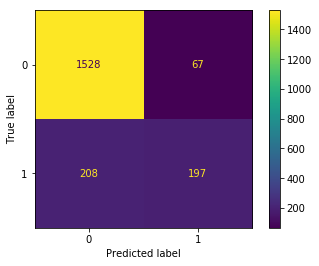

In [136]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# FIM

> Professor Diego Dorgam  
> [@diegodorgam](https://twitter.com/diegodorgam)
